<h2>Introduction</h2>

In this exercise you'll train a neural network on the *Fuel Economy* dataset and then explore the effect of the learning rate and batch size on SGD.

When you're ready, run this next cell to set everything up!

In [14]:
# Setup plotting
import matplotlib.pyplot as plt

In the Fuel Economy dataset your task is to predict the fuel economy of an automobile given features like its type of engine or the year it was made.

First load the dataset by running the cell below.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.model_selection import train_test_split

fuel = pd.read_csv('../fuel.csv')

X = fuel.copy()
# Remove target
y = X.pop('FE')

preprocessor = make_column_transformer(
    (StandardScaler(),
     make_column_selector(dtype_include=np.number)),
    (OneHotEncoder(sparse_output=False),
     make_column_selector(dtype_include=object)),
)

X = preprocessor.fit_transform(X)
y = np.log(y) # log transform target instead of standardizing

input_shape = [X.shape[1]]
print("Input shape: {}".format(input_shape))

Input shape: [50]


Take a look at the data if you like. Our target in this case is the 'FE' column and the remaining columns are the features.

In [16]:
fuel.head()
pd.DataFrame(X[:10,:]).head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.913643,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.913643,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.530594,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.530594,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.296693,2.120794,0.524148,-1.458464,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Run the next cell to define the network we'll use for this task.

In [18]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    keras.Input(shape=input_shape),
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dense(128, activation='relu'),    
    layers.Dense(64, activation='relu'),
    layers.Dense(1),
])

<h3>1) Add Loss and Optimizer</h3>

Before training the network we need to define the loss and optimizer we'll use. Using the model's compile method, add the Adam optimizer and MAE loss.

In [19]:
model.compile(
    optimizer='adam',
    loss='mae'
)

<h3>2) Train Model</h3>

Once you've defined the model and compiled it with a loss and optimizer you're ready for training. Train the network for 200 epochs with a batch size of 128. The input data is X with target y.

In [20]:
history = model.fit(
    X, y,
    batch_size=128,
    epochs=200
)

Epoch 1/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 2.8149
Epoch 2/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.0541 
Epoch 3/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6474 
Epoch 4/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3488 
Epoch 5/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2328 
Epoch 6/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1886 
Epoch 7/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1413 
Epoch 8/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1213
Epoch 9/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0954 
Epoch 10/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0881 
Epoch 11/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0761 
Epoch 12/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0761 
Epoch 13/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0669 
Epoch 14/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0630 
Epoch 15/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0597 
Epoch 16/200
9/9 ━━━

The last step is to look at the loss curves and evaluate the training. Run the cell below to get a plot of the training loss.

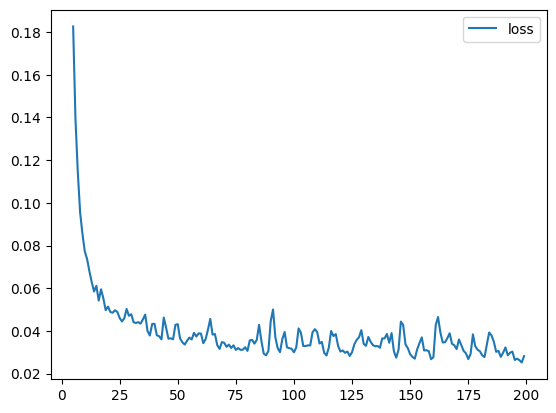

In [21]:
import pandas as pd

history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5. You can change this to get a different view.
history_df.loc[5:, ['loss']].plot();